In [71]:
from jiwer import wer
import speech_recognition as sr
import os
import matplotlib.pyplot as plt
import numpy as np

In [58]:
def audio_reco(file, lang):
    r = sr.Recognizer()
    with sr.AudioFile(file) as source:
        try:
            audio_data = r.record(source)
            query = r.recognize_google(audio_data, language=lang)
            return query.lower()
        except sr.UnknownValueError:
            return ""

In [93]:
reference = "obroc sie w miejscu"
hypothesis = audio_reco("public/chin_speed_pitch/go_backward_and_turn_left.wav", "en-US")

error = wer(reference, hypothesis)
print(reference, hypothesis)
print(error)

obroc sie w miejscu go backward and turn left
1.25


In [20]:
public_list = os.listdir("public")
folders=[]
for folder in public_list:
    if folder.find(".")==-1:
        folders.append(folder)
print(folders)

['chin_speed_pitch', 'eng_norm', 'pol', 'eng_fast', 'indian_acc']


In [59]:
chin_speed_pitch = [] #Hong Kong English acc, pitch:+20, speed:0.5
eng_norm = [] #English US
pol = [] #Polish
eng_fast = [] # English US, speed 2.0
indian_acc = [] #Indian English acc
list_of_lists = []
for id, f in enumerate(folders):
    list_name = os.listdir(f"public/{f}")
    names=[]
    files=[]
    for item in list_name:
        files.append(f"public/{f}/{item}")
        names.append((item.replace(".wav", "")).replace("_", " "))
    if id==0:
        chin_speed_pitch.append(files)
        chin_speed_pitch.append(names)
        list_of_lists.append(('chin_speed_pitch', chin_speed_pitch))
    elif id==1:
        eng_norm.append(files)
        eng_norm.append(names)
        list_of_lists.append(('eng_norm', eng_norm))
    elif id==2:
        pol.append(files)
        pol.append(names)
        list_of_lists.append(('pol', pol))
    elif id==3:
        eng_fast.append(files)
        eng_fast.append(names)
        list_of_lists.append(('eng_fast', eng_fast))
    elif id==4:
        indian_acc.append(files)
        indian_acc.append(names)
        list_of_lists.append(('indian_acc', indian_acc))

for lst in list_of_lists:
    print(lst)

('chin_speed_pitch', [['public/chin_speed_pitch/spin_in_place.wav', 'public/chin_speed_pitch/go_forward.wav', 'public/chin_speed_pitch/stop.wav', 'public/chin_speed_pitch/go_backward_and_turn_right.wav', 'public/chin_speed_pitch/go_backward.wav', 'public/chin_speed_pitch/start_moving_forward.wav', 'public/chin_speed_pitch/go_forward_and_turn_left.wav', 'public/chin_speed_pitch/speed_05.wav', 'public/chin_speed_pitch/go_backward_and_turn_left.wav', 'public/chin_speed_pitch/go_forward_and_turn_right.wav'], ['spin in place', 'go forward', 'stop', 'go backward and turn right', 'go backward', 'start moving forward', 'go forward and turn left', 'speed 05', 'go backward and turn left', 'go forward and turn right']])
('eng_norm', [['public/eng_norm/spin_in_place.wav', 'public/eng_norm/go_forward.wav', 'public/eng_norm/stop.wav', 'public/eng_norm/go_backward_and_turn_right.wav', 'public/eng_norm/go_backward.wav', 'public/eng_norm/start_moving_forward.wav', 'public/eng_norm/go_forward_and_turn_l

In [60]:


for lst in list_of_lists:
    scores = []
    if lst[0]=='pol':
        lang = "pl-PL"
    else:
        lang = "en-US"
        
    for i in range(len(lst[1][0])):
            reference = lst[1][1][i]
            print(lst[1][0][i], lang)
            hypothesis = audio_reco(lst[1][0][i], lang)
            scores.append(wer(reference, hypothesis))
    lst[1].append(scores)
    print(lst)



public/chin_speed_pitch/spin_in_place.wav en-US
public/chin_speed_pitch/go_forward.wav en-US
public/chin_speed_pitch/stop.wav en-US
public/chin_speed_pitch/go_backward_and_turn_right.wav en-US
public/chin_speed_pitch/go_backward.wav en-US
public/chin_speed_pitch/start_moving_forward.wav en-US
public/chin_speed_pitch/go_forward_and_turn_left.wav en-US
public/chin_speed_pitch/speed_05.wav en-US
public/chin_speed_pitch/go_backward_and_turn_left.wav en-US
public/chin_speed_pitch/go_forward_and_turn_right.wav en-US
('chin_speed_pitch', [['public/chin_speed_pitch/spin_in_place.wav', 'public/chin_speed_pitch/go_forward.wav', 'public/chin_speed_pitch/stop.wav', 'public/chin_speed_pitch/go_backward_and_turn_right.wav', 'public/chin_speed_pitch/go_backward.wav', 'public/chin_speed_pitch/start_moving_forward.wav', 'public/chin_speed_pitch/go_forward_and_turn_left.wav', 'public/chin_speed_pitch/speed_05.wav', 'public/chin_speed_pitch/go_backward_and_turn_left.wav', 'public/chin_speed_pitch/go_forw

In [72]:
averages = []

for lst in list_of_lists:
    print(lst[1][2])
    ave = (sum(lst[1][2])/len(lst[1][2]))
    averages.append(ave)
    print(f"Average score of {lst[0]}: {ave}")

[0.6666666666666666, 0.0, 1.0, 0.0, 0.5, 0.0, 0.0, 1.0, 0.0, 0.0]
Average score of chin_speed_pitch: 0.31666666666666665
[0.6666666666666666, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.5, 0.0, 0.0]
Average score of eng_norm: 0.16666666666666666
[0.42857142857142855, 0.5, 0.5714285714285714, 1.0, 1.0, 0.6666666666666666, 0.5, 0.42857142857142855, 0.2857142857142857, 0.5]
Average score of pol: 0.5880952380952381
[1.0, 1.0, 0.0, 0.4, 0.5, 0.3333333333333333, 0.2, 0.5, 0.2, 0.4]
Average score of eng_fast: 0.4533333333333334
[0.3333333333333333, 0.0, 1.0, 0.2, 0.5, 0.0, 0.0, 0.5, 0.2, 0.0]
Average score of indian_acc: 0.2733333333333333


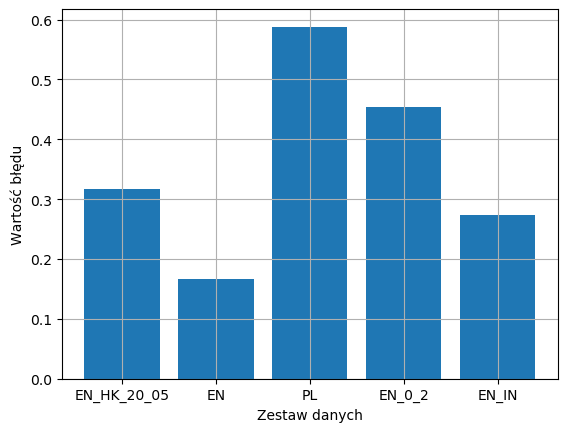

In [100]:

x = np.array(["EN_HK_20_05", "EN", "PL", "EN_0_2", "EN_IN"])
y = np.array([0.31666666666666665, 0.16666666666666666, 0.5880952380952381, 0.4533333333333334, 0.2733333333333333])

plt.bar(x,y)
plt.xlabel("Zestaw danych") 
plt.ylabel("Wartość błędu") 
plt.grid()
plt.show()

In [82]:
for lst in list_of_lists:
    print(lst)
    # if lst[0]=="pol":
    #     print(lst[1][1])

('chin_speed_pitch', [['public/chin_speed_pitch/spin_in_place.wav', 'public/chin_speed_pitch/go_forward.wav', 'public/chin_speed_pitch/stop.wav', 'public/chin_speed_pitch/go_backward_and_turn_right.wav', 'public/chin_speed_pitch/go_backward.wav', 'public/chin_speed_pitch/start_moving_forward.wav', 'public/chin_speed_pitch/go_forward_and_turn_left.wav', 'public/chin_speed_pitch/speed_05.wav', 'public/chin_speed_pitch/go_backward_and_turn_left.wav', 'public/chin_speed_pitch/go_forward_and_turn_right.wav'], ['spin in place', 'go forward', 'stop', 'go backward and turn right', 'go backward', 'start moving forward', 'go forward and turn left', 'speed 05', 'go backward and turn left', 'go forward and turn right'], []])
('eng_norm', [['public/eng_norm/spin_in_place.wav', 'public/eng_norm/go_forward.wav', 'public/eng_norm/stop.wav', 'public/eng_norm/go_backward_and_turn_right.wav', 'public/eng_norm/go_backward.wav', 'public/eng_norm/start_moving_forward.wav', 'public/eng_norm/go_forward_and_tu

In [78]:
newlist_pl=['jedź do przodu i skręć w lewo', 
            'zacznij ruch', 
            'jedź do tyłu i skręć w lewo', 
            'prędkość 05', 
            'jedź naprzód', 
            'jedź do tyłu', 
            'zatrzymaj się', 
            'jedź do tyłu i skręć w prawo', 
            'jedź do przodu i skręć w prawo', 
            'obróć się w miejscu']
print(newlist_pl[0])

jedź do przodu i skręć w lewo


In [83]:
list_of_lists_2 = list_of_lists.copy()
print(list_of_lists_2)

[('chin_speed_pitch', [['public/chin_speed_pitch/spin_in_place.wav', 'public/chin_speed_pitch/go_forward.wav', 'public/chin_speed_pitch/stop.wav', 'public/chin_speed_pitch/go_backward_and_turn_right.wav', 'public/chin_speed_pitch/go_backward.wav', 'public/chin_speed_pitch/start_moving_forward.wav', 'public/chin_speed_pitch/go_forward_and_turn_left.wav', 'public/chin_speed_pitch/speed_05.wav', 'public/chin_speed_pitch/go_backward_and_turn_left.wav', 'public/chin_speed_pitch/go_forward_and_turn_right.wav'], ['spin in place', 'go forward', 'stop', 'go backward and turn right', 'go backward', 'start moving forward', 'go forward and turn left', 'speed 05', 'go backward and turn left', 'go forward and turn right'], []]), ('eng_norm', [['public/eng_norm/spin_in_place.wav', 'public/eng_norm/go_forward.wav', 'public/eng_norm/stop.wav', 'public/eng_norm/go_backward_and_turn_right.wav', 'public/eng_norm/go_backward.wav', 'public/eng_norm/start_moving_forward.wav', 'public/eng_norm/go_forward_and_

In [86]:
# list_of_lists_2=list_of_lists

for lst in list_of_lists:
    scores = []
    if lst[0]=='pol':
        lang = "pl-PL"
        # for i in range(len(lst[1][0])):
        #     # reference = lst[1][1][i]
        #     reference = newlist_pl[i]
        #     print(lst[1][0][i], lang)
        #     hypothesis = audio_reco(lst[1][0][i], lang)
        #     scores.append(wer(reference, hypothesis))
        #     lst[1][2]=scores
    elif lst[0]=='chin_speed_pitch':
        lst[1][2]=[0.6666666666666666, 0.0, 1.0, 0.0, 0.5, 0.0, 0.0, 1.0, 0.0, 0.0]
    elif lst[0]=='eng_norm':
        lst[1][2]=[0.6666666666666666, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.5, 0.0, 0.0]
    elif lst[0]=='eng_fast':
        lst[1][2]=[1.0, 1.0, 0.0, 0.4, 0.5, 0.3333333333333333, 0.2, 0.5, 0.2, 0.4]
    elif lst[0]=='indian_acc':
        lst[1][2]=[0.3333333333333333, 0.0, 1.0, 0.2, 0.5, 0.0, 0.0, 0.5, 0.2, 0.0]
        
    
    
    print(lst)

('chin_speed_pitch', [['public/chin_speed_pitch/spin_in_place.wav', 'public/chin_speed_pitch/go_forward.wav', 'public/chin_speed_pitch/stop.wav', 'public/chin_speed_pitch/go_backward_and_turn_right.wav', 'public/chin_speed_pitch/go_backward.wav', 'public/chin_speed_pitch/start_moving_forward.wav', 'public/chin_speed_pitch/go_forward_and_turn_left.wav', 'public/chin_speed_pitch/speed_05.wav', 'public/chin_speed_pitch/go_backward_and_turn_left.wav', 'public/chin_speed_pitch/go_forward_and_turn_right.wav'], ['spin in place', 'go forward', 'stop', 'go backward and turn right', 'go backward', 'start moving forward', 'go forward and turn left', 'speed 05', 'go backward and turn left', 'go forward and turn right'], [0.6666666666666666, 0.0, 1.0, 0.0, 0.5, 0.0, 0.0, 1.0, 0.0, 0.0]])
('eng_norm', [['public/eng_norm/spin_in_place.wav', 'public/eng_norm/go_forward.wav', 'public/eng_norm/stop.wav', 'public/eng_norm/go_backward_and_turn_right.wav', 'public/eng_norm/go_backward.wav', 'public/eng_nor

In [87]:
averages = []

for lst in list_of_lists:
    print(lst[1][2])
    ave = (sum(lst[1][2])/len(lst[1][2]))
    averages.append(ave)
    print(f"Average score of {lst[0]}: {ave}")

[0.6666666666666666, 0.0, 1.0, 0.0, 0.5, 0.0, 0.0, 1.0, 0.0, 0.0]
Average score of chin_speed_pitch: 0.31666666666666665
[0.6666666666666666, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.5, 0.0, 0.0]
Average score of eng_norm: 0.16666666666666666
[0.14285714285714285, 0.5, 0.14285714285714285, 0.5, 0.5, 0.3333333333333333, 0.5, 0.0, 0.0, 0.0]
Average score of pol: 0.2619047619047619
[1.0, 1.0, 0.0, 0.4, 0.5, 0.3333333333333333, 0.2, 0.5, 0.2, 0.4]
Average score of eng_fast: 0.4533333333333334
[0.3333333333333333, 0.0, 1.0, 0.2, 0.5, 0.0, 0.0, 0.5, 0.2, 0.0]
Average score of indian_acc: 0.2733333333333333


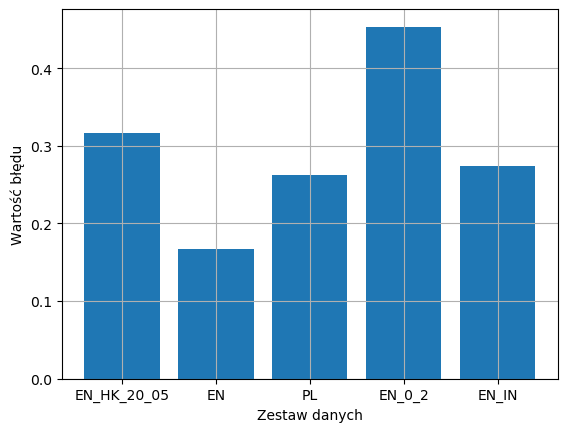

In [101]:
x = np.array(["EN_HK_20_05", "EN", "PL", "EN_0_2", "EN_IN"])
y = np.array(averages)

plt.bar(x,y)
plt.xlabel("Zestaw danych") 
plt.ylabel("Wartość błędu") 
plt.grid()
plt.show()

In [95]:


for lst in list_of_lists:
    scores_short = []
    scores_long = []
    for id, item in enumerate(lst[1][1]):
        if len(item)<=15:
            # print(lst[0],": ", item, lst[1][2][id])
            scores_short.append(lst[1][2][id])
        else:
            # print(lst[0],": ", item, lst[1][2][id])
            scores_long.append(lst[1][2][id])
    # print(lst[0], scores_short)
    # print(lst[0], scores_long)
    # print(lst[1][1])
    lst[1].append(scores_short)
    lst[1].append(scores_long)
    print(lst)


('chin_speed_pitch', [['public/chin_speed_pitch/spin_in_place.wav', 'public/chin_speed_pitch/go_forward.wav', 'public/chin_speed_pitch/stop.wav', 'public/chin_speed_pitch/go_backward_and_turn_right.wav', 'public/chin_speed_pitch/go_backward.wav', 'public/chin_speed_pitch/start_moving_forward.wav', 'public/chin_speed_pitch/go_forward_and_turn_left.wav', 'public/chin_speed_pitch/speed_05.wav', 'public/chin_speed_pitch/go_backward_and_turn_left.wav', 'public/chin_speed_pitch/go_forward_and_turn_right.wav'], ['spin in place', 'go forward', 'stop', 'go backward and turn right', 'go backward', 'start moving forward', 'go forward and turn left', 'speed 05', 'go backward and turn left', 'go forward and turn right'], [0.6666666666666666, 0.0, 1.0, 0.0, 0.5, 0.0, 0.0, 1.0, 0.0, 0.0], [0.6666666666666666, 0.0, 1.0, 0.5, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0]])
('eng_norm', [['public/eng_norm/spin_in_place.wav', 'public/eng_norm/go_forward.wav', 'public/eng_norm/stop.wav', 'public/eng_norm/go_backward_an

In [97]:
averages_short = []
averages_long = []

for lst in list_of_lists:
    # print(lst[1][3])
    ave_sh = (sum(lst[1][3])/len(lst[1][3]))
    averages_short.append(ave_sh)
    print(f"Average short score of {lst[0]}: {ave_sh}")

    # print(lst[1][4])
    ave_lg = (sum(lst[1][4])/len(lst[1][4]))
    averages_long.append(ave_lg)
    print(f"Average long score of {lst[0]}: {ave_lg}")

Average short score of chin_speed_pitch: 0.6333333333333333
Average long score of chin_speed_pitch: 0.0
Average short score of eng_norm: 0.3333333333333333
Average long score of eng_norm: 0.0
Average short score of pol: 0.4666666666666666
Average long score of pol: 0.05714285714285714
Average short score of eng_fast: 0.6
Average long score of eng_fast: 0.30666666666666664
Average short score of indian_acc: 0.4666666666666666
Average long score of indian_acc: 0.08


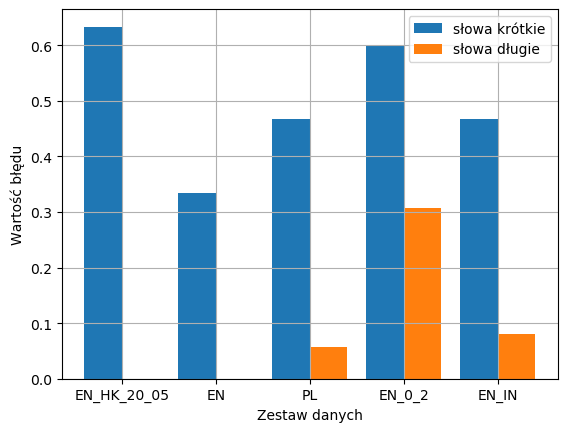

In [99]:
x = np.array(["EN_HK_20_05", "EN", "PL", "EN_0_2", "EN_IN"])
y = np.array(averages_short)
z = np.array(averages_long)

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, y, 0.4, label = 'słowa krótkie') 
plt.bar(x_axis + 0.2, z, 0.4, label = 'słowa długie') 
  
plt.xticks(x_axis, x) 
plt.xlabel("Zestaw danych") 
plt.ylabel("Wartość błędu") 
# plt.title("Number of Students in each group") 
plt.legend() 
plt.grid()
plt.show() 

# plt.bar(x,y)
# plt.grid()
# plt.show()